In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functions import leer_datos

url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
df = leer_datos(url)

Estandarizamos los nombres de las columnas y mostramos todas las disponibles

In [2]:
pd.set_option("display.max_columns", None)
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

Eliminamos los valores nulos de la columna "date"

In [3]:
df = df.dropna(subset = ["date"])

Eliminamos las filas cuya columna "year" no aporte valor

In [4]:
df = df[df["year"] != 0.0]

Cambiamos el type de la columna "year" de float a int

In [5]:
df.dtypes

date               object
year              float64
type               object
country            object
state              object
location           object
activity           object
name               object
sex                object
age                object
injury             object
unnamed:_11        object
time               object
species            object
source             object
pdf                object
href_formula       object
href               object
case_number        object
case_number.1      object
original_order    float64
unnamed:_21        object
unnamed:_22        object
dtype: object

In [6]:
df["year"] = df["year"].astype("Int64")

In [7]:
df.dtypes

date               object
year                Int64
type               object
country            object
state              object
location           object
activity           object
name               object
sex                object
age                object
injury             object
unnamed:_11        object
time               object
species            object
source             object
pdf                object
href_formula       object
href               object
case_number        object
case_number.1      object
original_order    float64
unnamed:_21        object
unnamed:_22        object
dtype: object

Filtramos las fechas a los últimos 50 años

In [8]:
año_inicio = 1974
año_final = 2024

df = df[(df["year"] >= año_inicio) & (df["year"] <= año_final)]

Eliminamos columnas vacías

In [9]:
df = df.drop(columns = ["pdf", "href_formula", "href", "case_number", "case_number.1", "original_order", "unnamed:_21", "unnamed:_22"])

Renombramos columna fallecidos

In [10]:
df = df.rename(columns = {"unnamed:_11": "fatal"})

Corregimos valores nulos de determinadas columnas y los sustituimos por "Unknown" o "U"

In [11]:
df["activity"] = df["activity"].fillna("Unknown")
df["name"] = df["name"].fillna("Unknown")
df["sex"] = df["sex"].fillna("U")
df["species"] = df["species"].fillna("Unknown")
df["fatal"] = df["fatal"].fillna("N")

In [12]:
df

,date,year,type,country,state,location,activity,name,sex,age,injury,fatal,time,species,source
0,15 Mar 2024,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",N,16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,Unknown,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",Unknown,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,07-Jan-1974,1974,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Amanzimtoti,Swimming,Cornelius “Les” Pyper,M,33,Knee & calf lacerated,N,14h10,2 m to 2.5 m [6.75' to 8.25'] shark,"L. Pyper, J. Bass, G. Charter; B. Davis, M. Le..."
3905,07-Jan-1974,1974,Unprovoked,MOZAMBIQUE,Gaza,Xai Xai,Swimming,Oaulkurt-Pape,M,NaN,FATAL,Y,NaN,Unknown,"Johannesburg Star, 1/8/1974"
3906,07-Jan-1974,1974,Unprovoked,MOZAMBIQUE,Gaza,Xai Xai,Swimming,male,M,32,FATAL,Y,NaN,Unknown,"P. Logan, GSAF"
3907,Summer 1974,1974,Unprovoked,AUSTRALIA,Western Australia,Emu Channel,Spearfishing,Glen Tunbridge,M,NaN,8 to 10 puncture marks around knee,N,NaN,"Bronze whaler shark, 4'",G. Tunbridge


In [13]:
target_columns = ["date", "year", "country", "state", "activity", "sex", "fatal"]
df_mvp = df[target_columns]

In [14]:
df

,date,year,type,country,state,location,activity,name,sex,age,injury,fatal,time,species,source
0,15 Mar 2024,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",N,16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,Unknown,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",Unknown,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,07-Jan-1974,1974,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Amanzimtoti,Swimming,Cornelius “Les” Pyper,M,33,Knee & calf lacerated,N,14h10,2 m to 2.5 m [6.75' to 8.25'] shark,"L. Pyper, J. Bass, G. Charter; B. Davis, M. Le..."
3905,07-Jan-1974,1974,Unprovoked,MOZAMBIQUE,Gaza,Xai Xai,Swimming,Oaulkurt-Pape,M,NaN,FATAL,Y,NaN,Unknown,"Johannesburg Star, 1/8/1974"
3906,07-Jan-1974,1974,Unprovoked,MOZAMBIQUE,Gaza,Xai Xai,Swimming,male,M,32,FATAL,Y,NaN,Unknown,"P. Logan, GSAF"
3907,Summer 1974,1974,Unprovoked,AUSTRALIA,Western Australia,Emu Channel,Spearfishing,Glen Tunbridge,M,NaN,8 to 10 puncture marks around knee,N,NaN,"Bronze whaler shark, 4'",G. Tunbridge


In [15]:
df_mvp

,date,year,country,state,activity,sex,fatal
0,15 Mar 2024,2024,AUSTRALIA,Queensland,Swimming,F,N
1,04 Mar 2024,2024,USA,Hawaii,Surfing,M,N
2,02 Mar-2024,2024,USA,Hawaii,Swimming,F,N
3,25 Feb-2024,2024,AUSTRALIA,Western Australia,Unknown,F,N
4,14 Feb-2024,2024,INDIA,Maharashtra,Fishing,M,N
...,...,...,...,...,...,...,...
3904,07-Jan-1974,1974,SOUTH AFRICA,KwaZulu-Natal,Swimming,M,N
3905,07-Jan-1974,1974,MOZAMBIQUE,Gaza,Swimming,M,Y
3906,07-Jan-1974,1974,MOZAMBIQUE,Gaza,Swimming,M,Y
3907,Summer 1974,1974,AUSTRALIA,Western Australia,Spearfishing,M,N


In [16]:
df_mvp = df_mvp.dropna(subset=["country"])

In [17]:
df_mvp["country"].isnull().value_counts()

country
False    3904
Name: count, dtype: int64

In [18]:
df_mvp

,date,year,country,state,activity,sex,fatal
0,15 Mar 2024,2024,AUSTRALIA,Queensland,Swimming,F,N
1,04 Mar 2024,2024,USA,Hawaii,Surfing,M,N
2,02 Mar-2024,2024,USA,Hawaii,Swimming,F,N
3,25 Feb-2024,2024,AUSTRALIA,Western Australia,Unknown,F,N
4,14 Feb-2024,2024,INDIA,Maharashtra,Fishing,M,N
...,...,...,...,...,...,...,...
3904,07-Jan-1974,1974,SOUTH AFRICA,KwaZulu-Natal,Swimming,M,N
3905,07-Jan-1974,1974,MOZAMBIQUE,Gaza,Swimming,M,Y
3906,07-Jan-1974,1974,MOZAMBIQUE,Gaza,Swimming,M,Y
3907,Summer 1974,1974,AUSTRALIA,Western Australia,Spearfishing,M,N


In [19]:
df_mvp = df_mvp.drop_duplicates()

df_mvp

,date,year,country,state,activity,sex,fatal
0,15 Mar 2024,2024,AUSTRALIA,Queensland,Swimming,F,N
1,04 Mar 2024,2024,USA,Hawaii,Surfing,M,N
2,02 Mar-2024,2024,USA,Hawaii,Swimming,F,N
3,25 Feb-2024,2024,AUSTRALIA,Western Australia,Unknown,F,N
4,14 Feb-2024,2024,INDIA,Maharashtra,Fishing,M,N
...,...,...,...,...,...,...,...
3903,09-Jan-1974,1974,AUSTRALIA,South Australia,Diving for abalone,M,Y
3904,07-Jan-1974,1974,SOUTH AFRICA,KwaZulu-Natal,Swimming,M,N
3905,07-Jan-1974,1974,MOZAMBIQUE,Gaza,Swimming,M,Y
3907,Summer 1974,1974,AUSTRALIA,Western Australia,Spearfishing,M,N


In [20]:
df_mvp.loc[:, "country"] = df_mvp["country"].str.upper()

In [21]:
df_mvp["fatal"].unique()

array(['N', 'Y', 'M', 'F', 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2'],
      dtype=object)

In [22]:

df_mvp.loc[:, 'fatal'] = df_mvp['fatal'].replace({'Y': 1, 'N': 0, "M": 0, "F": 0, "n": 0, "Nq": 0, "UNKNOWN": 0, 2017: 0, "Y x 2": 0})

In [23]:
df_mvp["fatal"].unique()

array([0, 1], dtype=object)

In [24]:
df_mvp.loc[:, "fatal"] = df_mvp["fatal"].astype("int64")
df_mvp.dtypes

date        object
year         Int64
country     object
state       object
activity    object
sex         object
fatal       object
dtype: object

In [25]:
df_mvp["fatal"]

0       0
1       0
2       0
3       0
4       0
       ..
3903    1
3904    0
3905    1
3907    0
3908    1
Name: fatal, Length: 3845, dtype: object

In [26]:
pivot_fatal = df_mvp.pivot_table(values="fatal", index=["country", "year"], aggfunc="sum")

print("Ataques fatales por año y país")
pivot_fatal

Ataques fatales por año y país


fatal
country   year      
 TONGA    2000     0
          2004     1
ANGOLA    1993     0
ANTIGUA   2011     0
ARGENTINA 2023     0
...              ...
VENEZUELA 2004     0
          2005     0
VIETNAM   2009     0
          2010     0
YEMEN     2007     1

[727 rows x 1 columns]

In [27]:
group = df.groupby('country').size().reset_index(name='count')

print(group)

       country  count
0        TONGA      3
1       ANGOLA      1
2      ANTIGUA      1
3    ARGENTINA      1
4        ARUBA      1
..         ...    ...
124        USA   1872
125    VANUATU      9
126  VENEZUELA      5
127    VIETNAM     10
128      YEMEN      1

[129 rows x 2 columns]


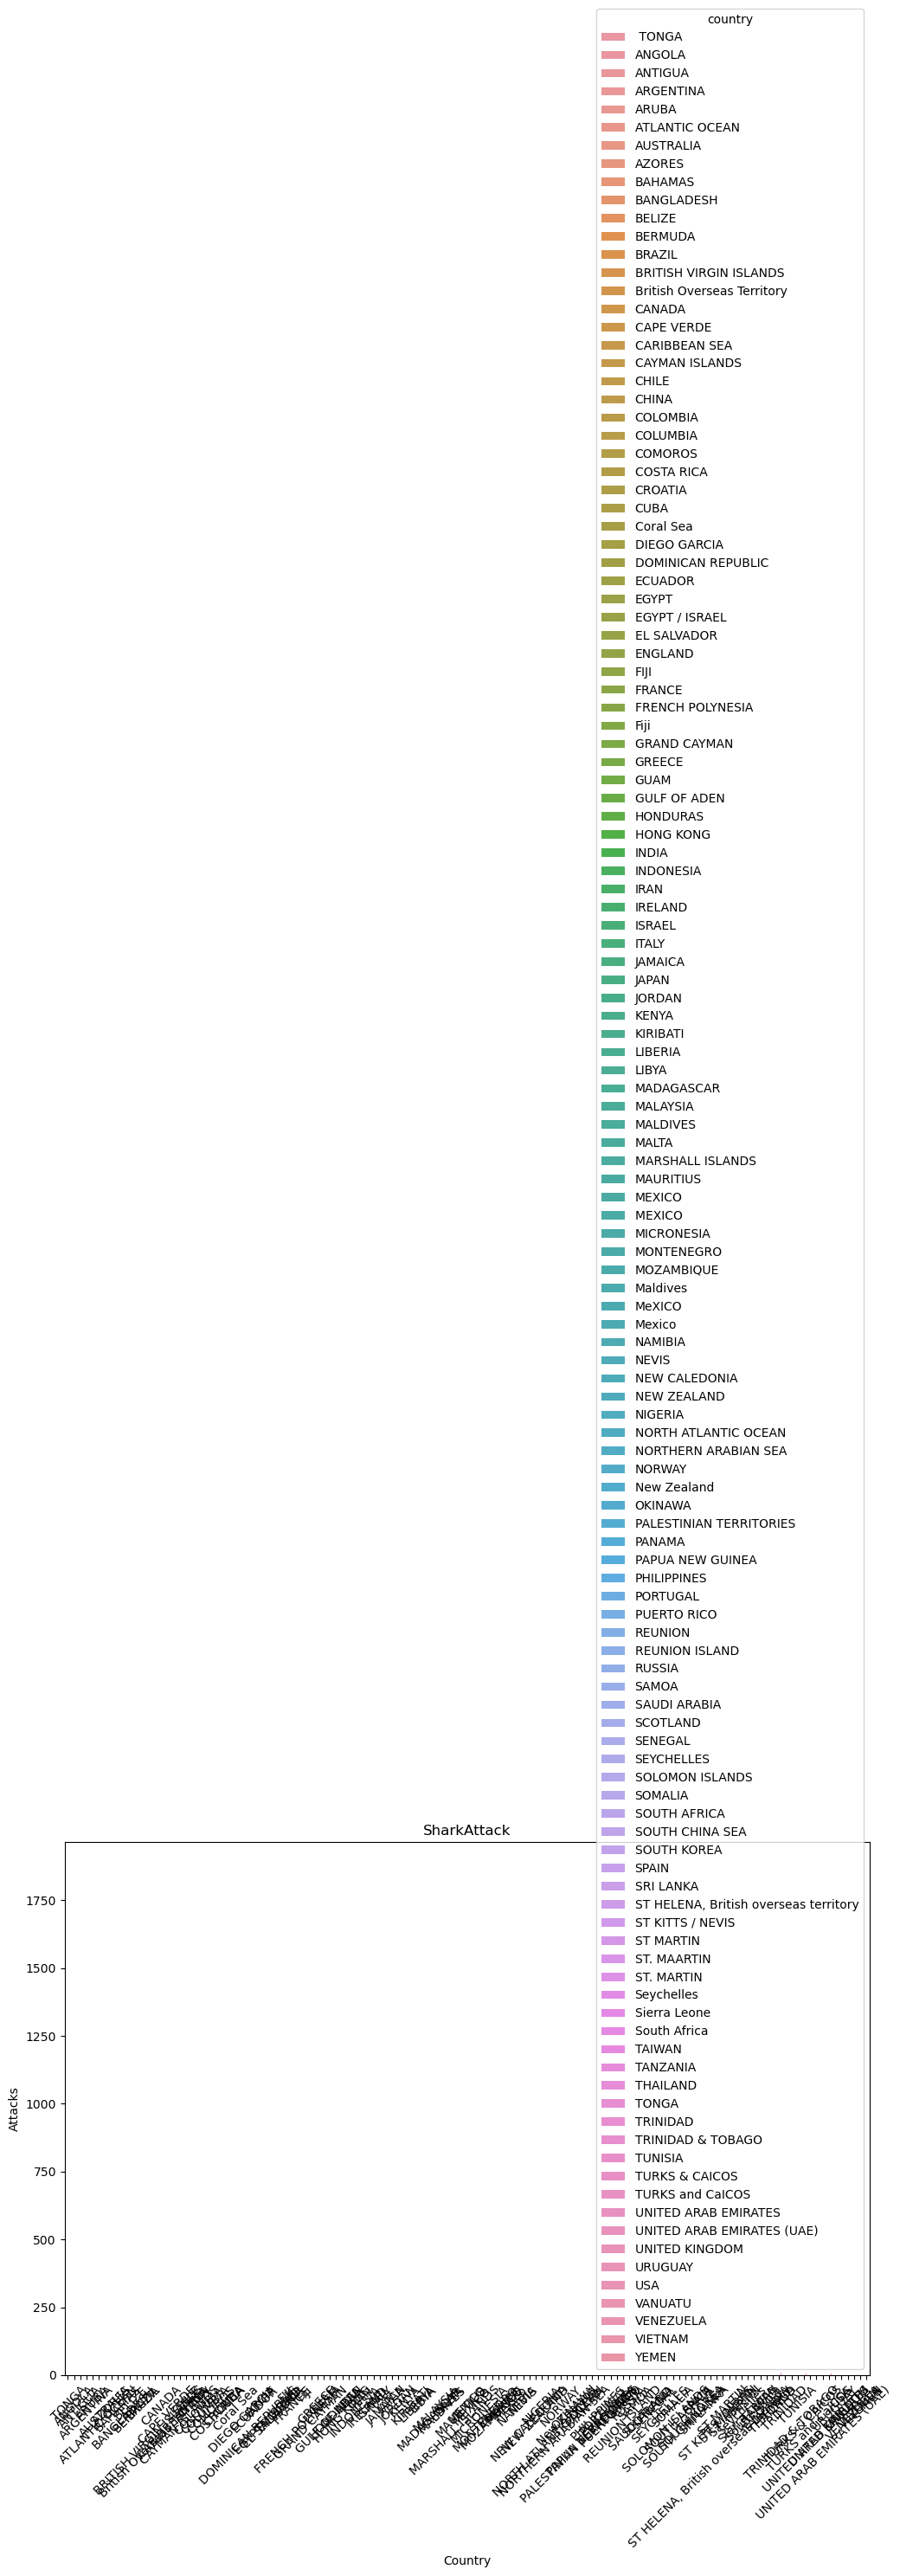

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='count', hue='country', data=group)

plt.title('SharkAttack')
plt.xlabel('Country')
plt.ylabel('Attacks')
plt.xticks(rotation=45)  

plt.show()